## Locally Weighted Regression
- 1) Read and Normalise the Dataset
- 2) Generate W for every Query Point
- 3) No training is involved, directly make predictions using closed solution we derived! (X'WX)inv*(X'WY) where X'is X transpose
- 4) Find the best value of Tau(Bandwidth Parameter) |Cross Validation|

## Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfx = pd.read_csv("weightedX.csv")
dfy = pd.read_csv("weightedY.csv")

In [3]:
X = dfx.values
Y = dfy.values
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


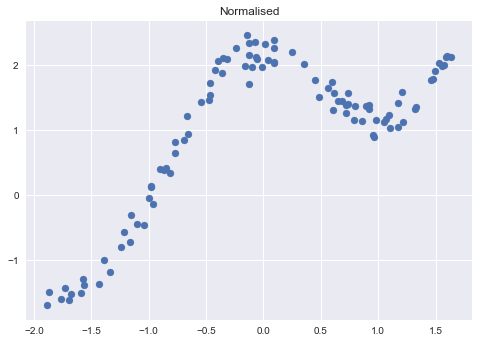

In [4]:
#Normalise the data
u = np.mean(X)
std = np.std(X)
X = (X-u)/std

plt.style.use("seaborn")
plt.title("Normalised")
plt.scatter(X,Y)
plt.show()

## Find out W (mxm) diagonal matrix

a*b ==> a,b -->matrices -> Matrix Multiplication


a*b ==> a,b -->ndarray -->Element wise product

In [5]:
print(type(np.mat(np.eye(5))))

<class 'numpy.matrix'>


In [6]:
def getWeightedMatrix(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        W[i,i] = np.exp(np.dot((X[i]-query_point),(X[i]-query_point).T)/(-2*tau*tau))
    return W

In [7]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getWeightedMatrix(-1,X,0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


Tau is basically the bandwidth which tells how many neighours will effect current query.
**If value of Tau is large than weight will become 1 and it will be like normal linear regression. So we keep the value of Tau low**

## 3. Make Predictions

In [22]:
def predict(X,Y,query_point,tau):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((X,ones))
    
    qx = np.mat([query_point,1])
    
    W = getWeightedMatrix(qx,X,tau)
    
    theta = np.linalg.pinv(X.T*(W*X))*(X.T*(W*Y))
#     print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred      

In [23]:
theta,pred = predict(X,Y,1.0,1.0)
print(theta)

[[0.14069504]
 [1.45348191]]


In [24]:
print(pred)

[[1.59417694]]


## Visualise Predictions, Analyse the Effect of Tau

In [25]:
def plotPredictions(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

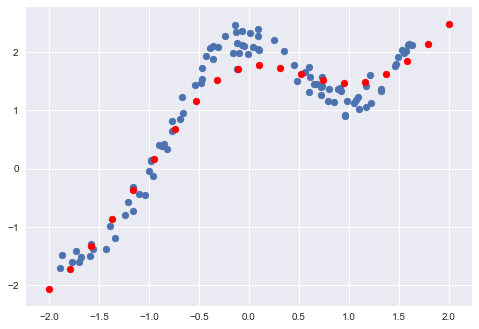

In [26]:
plotPredictions(0.5)

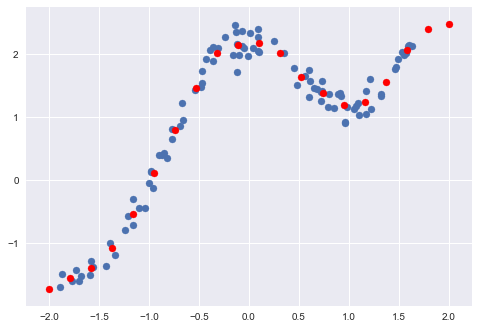

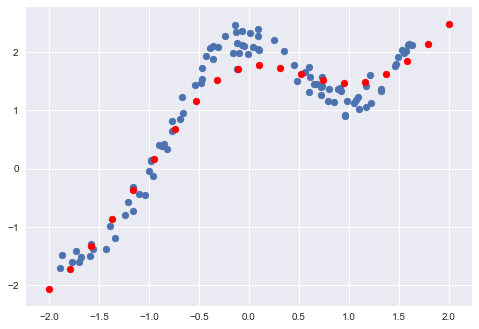

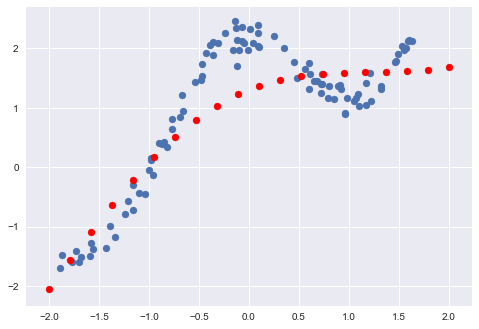

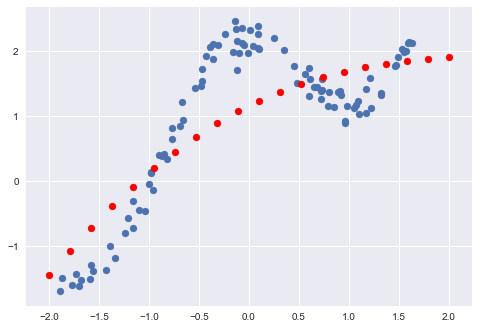

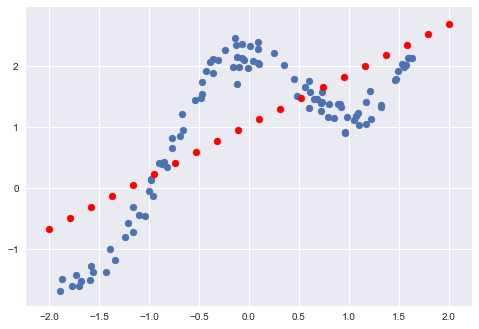

In [27]:
taus = [0.1,0.5,1,1.5,10]
for t in taus:
    plotPredictions(t)